# Pipeline description and example use

The instrumental signatures removed by this pipeline are: dark current (dark subtraction), sky background, and non-uniformity of sensor response (flat correction).

## Installation Instructions

pipeline.py file contains all processing functions. To use, `import pipeline`. Also make sure to add `%matplotlib inline` if you want to view any images. For full documentation of functions, look in `pipeline.py`

Dependencies are only basic scientific computing and astronomy pacakges: `numpy`, `matplotlib`, `astropy`, and `scipy`.

In [1]:
import pipeline
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Usage

### Some initialization

Assumes images are all stored in the folder `img_loc`, and image filenames have the form `n0001.fits`, `n0095.fits`, etc.

In [2]:
# path to where the images are located
img_loc = '2016jul14/'

In [3]:
# range of indices of images
skys = 95, 99
flats = 1, 20
darks = 21, 30

The calibration images needed are skys, flats, and darks. Technically, darks are not required for image processing because it is included in skys. If you want to use only skys, set the `master_dark` to an all-zero array that matches the shape of the other images.

In general, all processing in `pipeline.py` assumes that integration times between all the images passed in are the same. If this is not the case, skys and darks can be scaled linearly relatively safely, though some noise may be amplified/distorted. Flats don't need to be scaled for processing, but the master dark used to correct the flat should be scaled to match the flat. Once any master is made, it should be the same one used for all later processing (e.g. same `master_dark` for making the `master_sky`, and for processing the acquisition images).

### Make masters

In [4]:
master_dark = pipeline.make_master_dark(img_loc, *darks)

In [5]:
np.save('master_dark.npy', master_dark) #optional

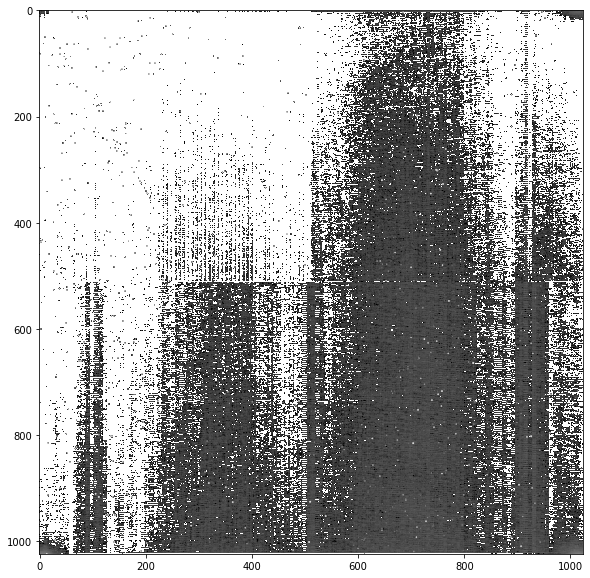

In [6]:
pipeline.plot_img(master_dark)

In [7]:
# These flats have 45s integration time, while darks (and everything else)
# have 30s. To dark-correct the flats properly, the dark is scaled (linearly).
master_flat = pipeline.make_master_flat(img_loc, *flats, master_dark*45/30)

In [8]:
np.save('master_flat.npy', master_flat) #optional

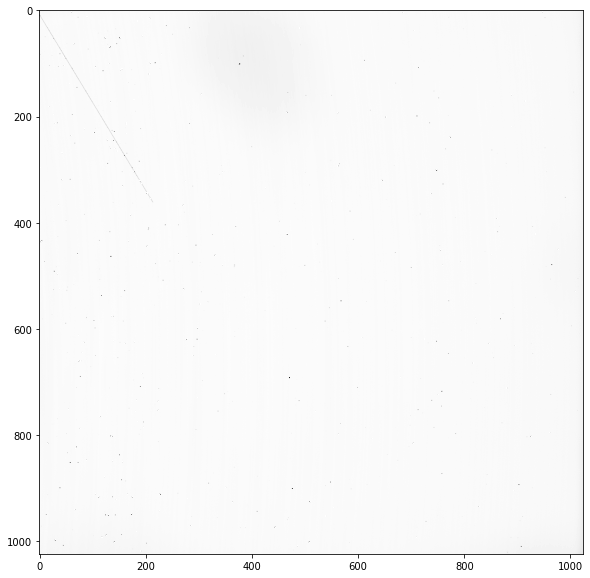

In [9]:
pipeline.plot_img(master_flat)

In [10]:
master_sky = pipeline.make_master_sky(img_loc, *skys, master_dark, master_flat)

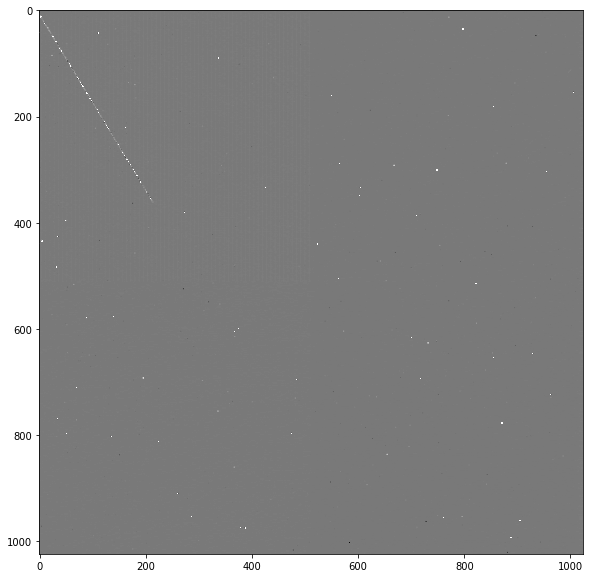

In [11]:
pipeline.plot_img(master_sky)

### Use masters to fully process some images

Text(0.5, 1.0, 'Raw')

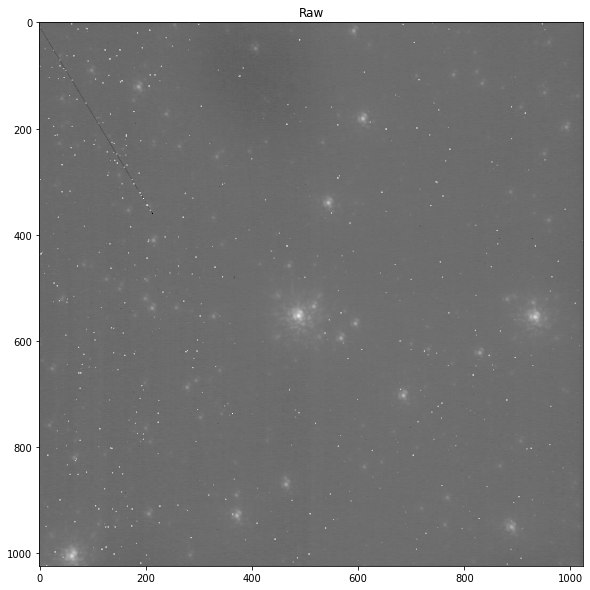

In [12]:
raw_img = pipeline.get_data(img_loc, 154, 154)[0]
pipeline.plot_img(raw_img)
plt.title('Raw')

Text(0.5, 1.0, 'Processed with pipeline')

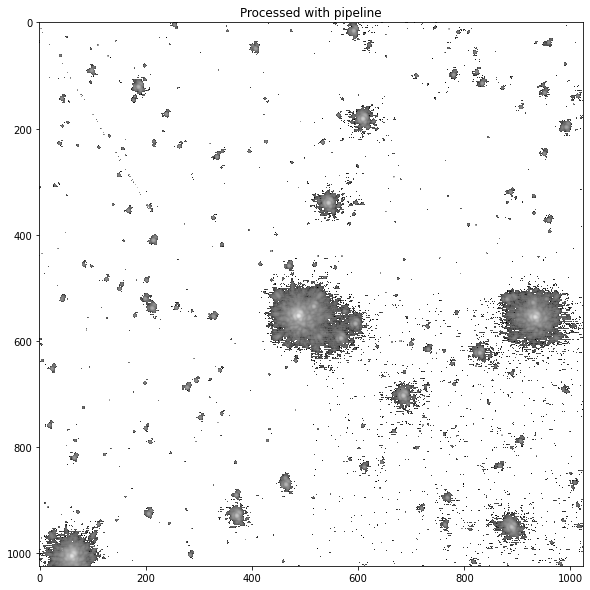

In [13]:
img_processed = pipeline.process_image(img_loc, 154, master_dark, master_flat, master_sky)
pipeline.plot_img(img_processed)
plt.title('Processed with pipeline')

You can also save the processed files as .fits files.

In [14]:
# !mkdir output

In [15]:
start, end = 154, 156
pipeline.process_fits(img_loc, 'output', start, end, master_dark, master_flat, master_sky)

### Some DS9 screenshots of raw and processed images

Because python just doesn't do a good job. Left is raw, right is processed.

`n0154.fits`

<img src="processed_154.png">

`n0155.fits`

<img src="processed_155.png">

`n0156.fits`

<img src="processed_156.png">